In [1]:
#Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import random
import pickle
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
import copy

In [223]:
#Importing Data science libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,MaxAbsScaler
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import FunctionTransformer,PowerTransformer
from sklearn.model_selection import train_test_split,cross_val_score,KFold,StratifiedGroupKFold,GridSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import VotingClassifier,BaggingClassifier,StackingClassifier
from sklearn.svm import SVC,SVR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans,DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,max_error
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

# Loading the Dataset

In [3]:
df = pd.read_csv('_data_setup/healthcare-dataset-stroke-data.csv')

# Understanding the data

In [4]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4380,45252,Male,54.0,0,0,Yes,Private,Urban,141.37,23.5,never smoked,0
3459,1260,Male,59.0,0,0,Yes,Govt_job,Urban,101.24,26.5,never smoked,0
291,11014,Male,4.0,0,0,No,children,Rural,79.17,20.0,Unknown,0
1549,68994,Male,65.0,0,0,Yes,Private,Urban,58.87,36.6,never smoked,0
2818,14976,Male,80.0,0,1,Yes,Private,Rural,82.41,26.3,smokes,0


In [5]:
df.shape

(5110, 12)

In [6]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.skew()

id                  -0.019913
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.055340
stroke               4.193284
dtype: float64

In [12]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


# Data cleaning and preperation

In [13]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [14]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [15]:
df[df['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [16]:
df = df[df['id'] != 56156].copy().reset_index()

In [17]:
df.shape

(5109, 13)

In [18]:
df['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [19]:
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [20]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [21]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

# Imputation

In [22]:
temp_df = df[['age','bmi']].copy()

In [23]:
knn_imputer = KNNImputer()

In [24]:
knn_imputer.fit(temp_df)

KNNImputer()

In [25]:
arr = knn_imputer.transform(temp_df)[:,1]

In [26]:
df['bmi'] = arr

In [27]:
df.isna().sum()

index                0
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [28]:
df.skew()

index                0.000213
id                  -0.019527
age                 -0.137430
hypertension         2.715026
heart_disease        3.946786
avg_glucose_level    1.572815
bmi                  1.040167
stroke               4.192807
dtype: float64

# Exploratory Data Analysis

In [29]:
df.columns

Index(['index', 'id', 'gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'],
      dtype='object')

In [30]:
df.drop(['index'],axis = 1,inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB


In [32]:
df.sample(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2694,41730,Female,46.0,0,0,No,Govt_job,Rural,112.29,23.5,Unknown,0


In [33]:
numeric_col_lst = ['age','avg_glucose_level','bmi']

In [34]:
category_col_lst = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']

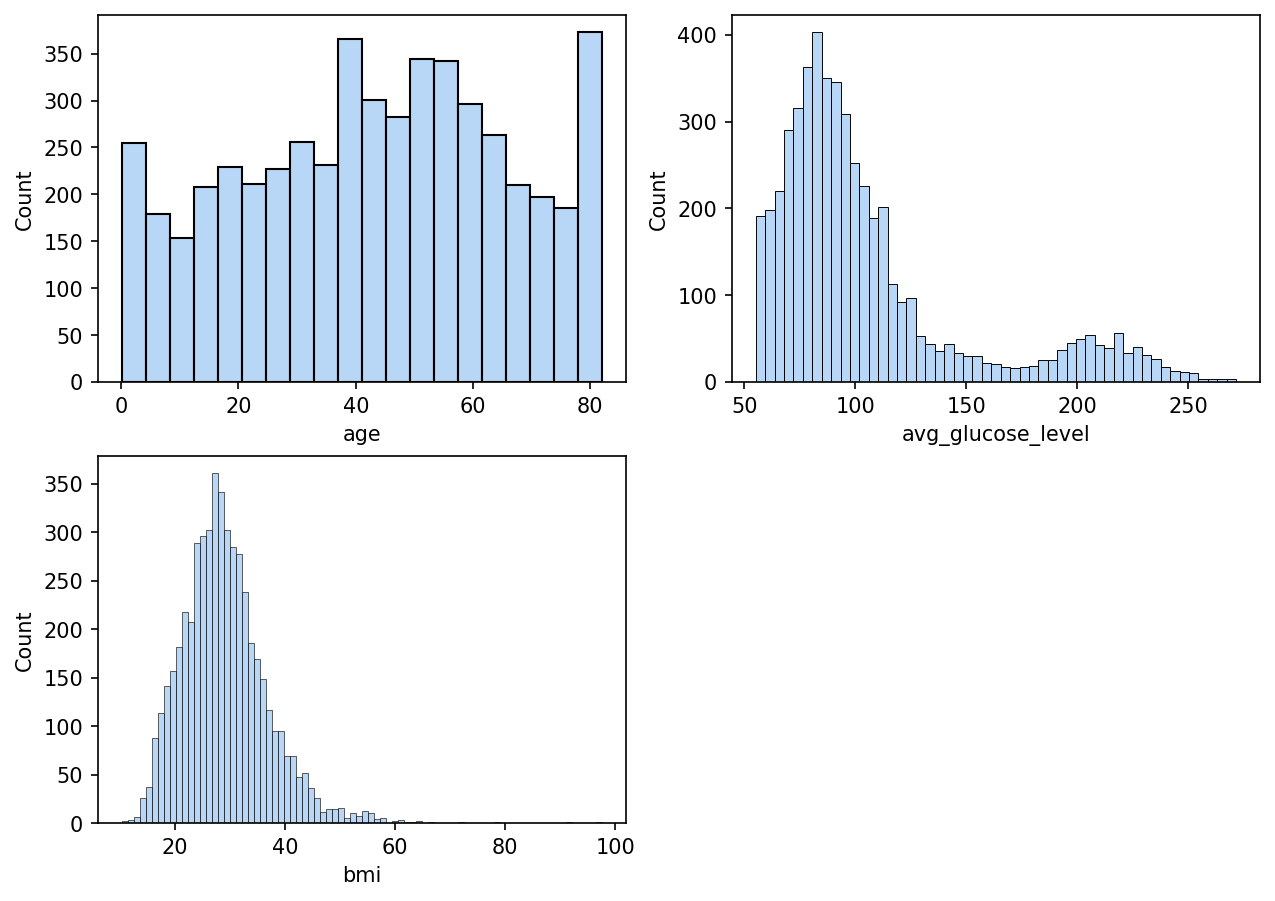

In [35]:
plt.figure(figsize=(10,7),dpi = 150)
for num,col in enumerate(numeric_col_lst,start=1):
    
    plt.subplot(2,2,num)
    
    sns.histplot(data = df,x = col,color=sns.color_palette('pastel')[0])

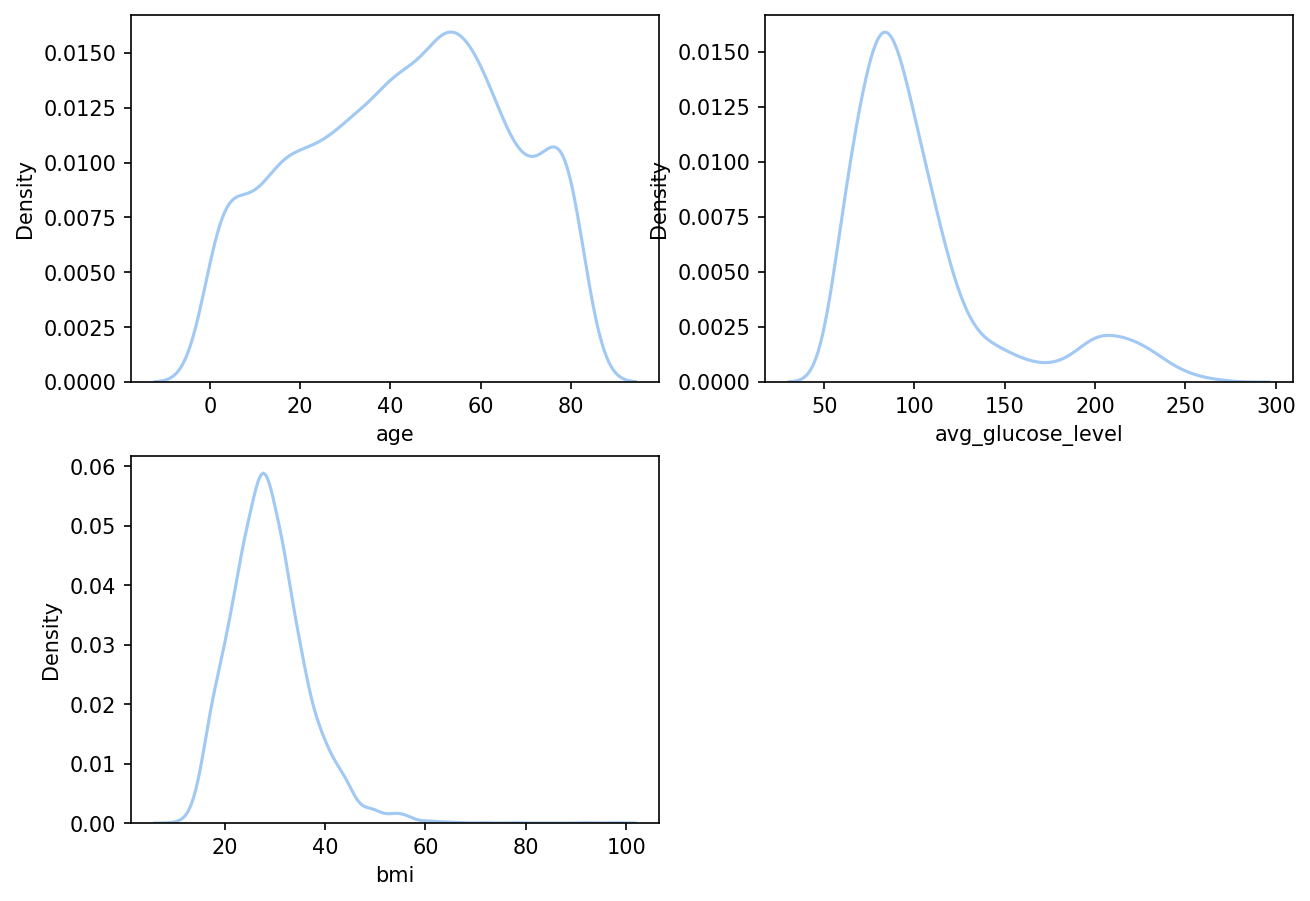

In [36]:
plt.figure(figsize=(10,7),dpi = 150)
for num,col in enumerate(numeric_col_lst,start=1):
    
    plt.subplot(2,2,num)
    
    sns.kdeplot(data = df,x = col,color=sns.color_palette('pastel')[0])

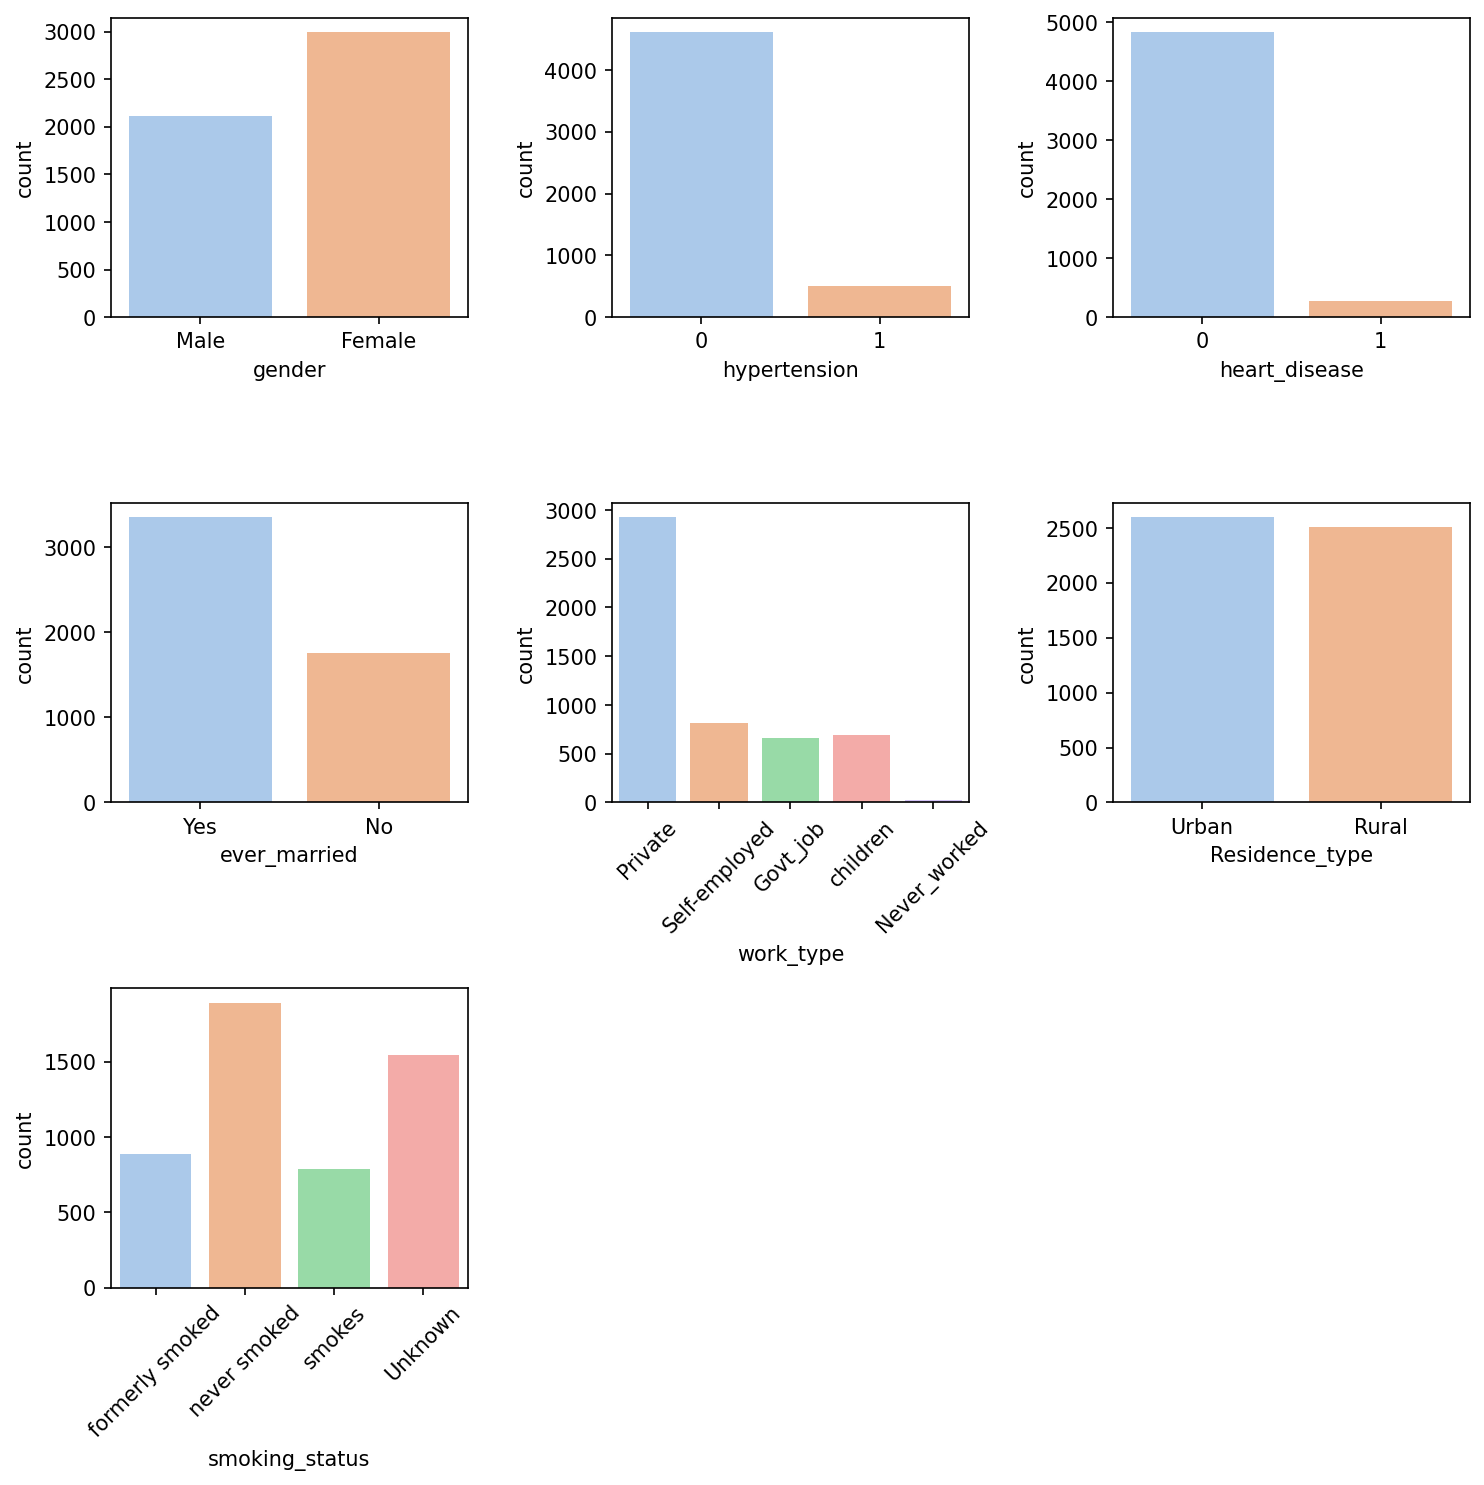

In [37]:
plt.figure(figsize=(10,10),dpi = 150)
for num,col in enumerate(category_col_lst,start=1):
    
    plt.subplot(3,3,num)
    
    sns.countplot(data = df,x = col,palette=sns.color_palette('pastel'))
    
    if col in ['work_type','smoking_status']:
        plt.xticks(rotation = 45)
    
plt.tight_layout()

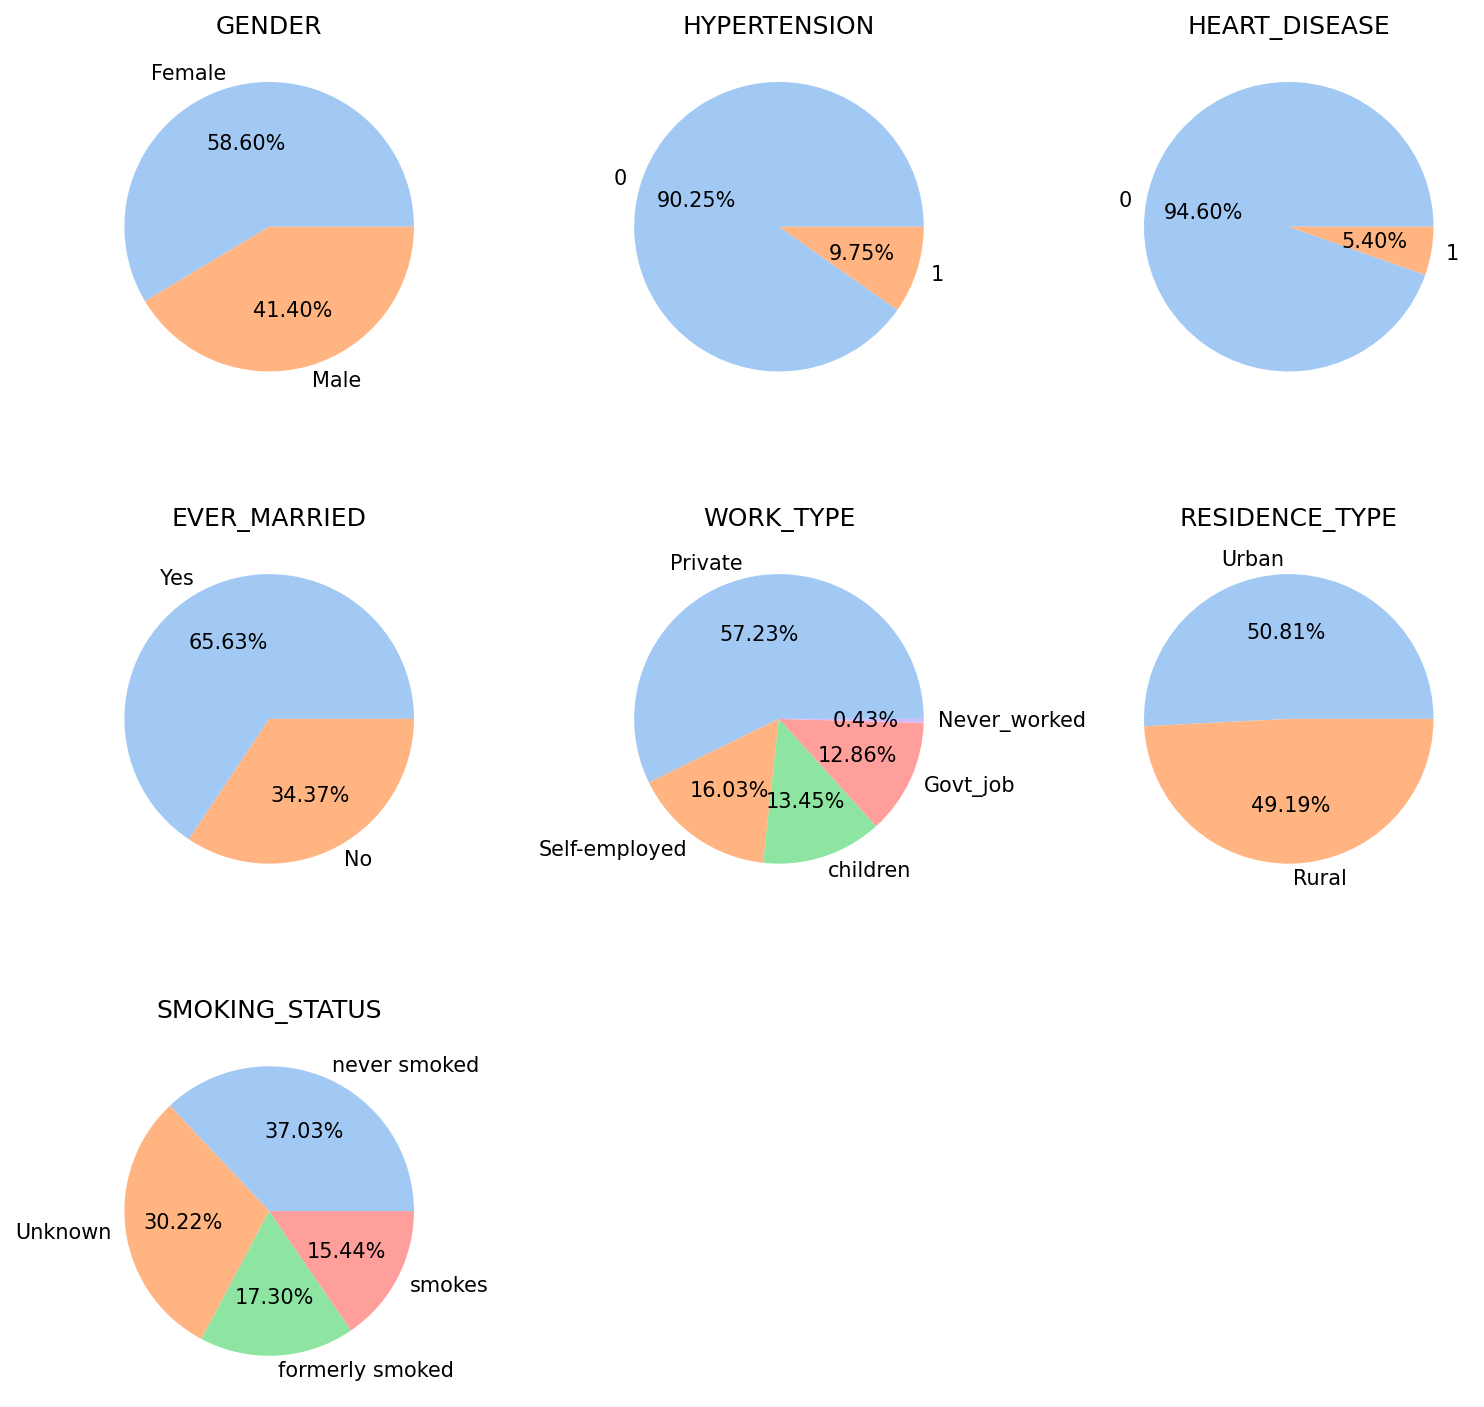

In [38]:
plt.figure(figsize=(10,10),dpi = 150)
for num,col in enumerate(category_col_lst,start=1):
    
    plt.subplot(3,3,num)
    
    plt.pie(df[col].value_counts(),labels=df[col].value_counts().keys(),
            colors=sns.color_palette('pastel'),
           autopct='%0.2f%%')
    
    plt.title(col.upper())

    
plt.tight_layout()

<Axes: xlabel='age', ylabel='Density'>

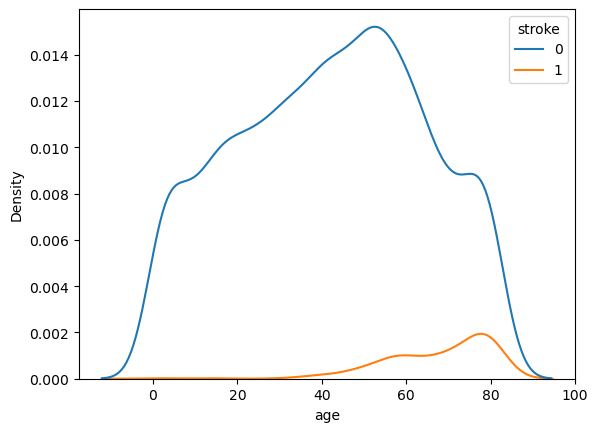

In [39]:
sns.kdeplot(data=df,x = 'age',hue = 'stroke')

<Axes: xlabel='bmi', ylabel='Density'>

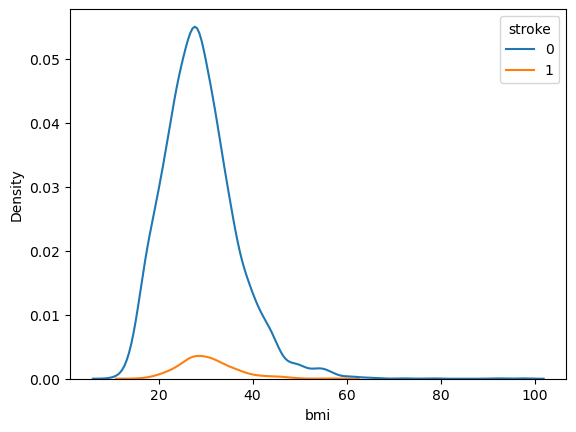

In [40]:
sns.kdeplot(data=df,x = 'bmi',hue = 'stroke')

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

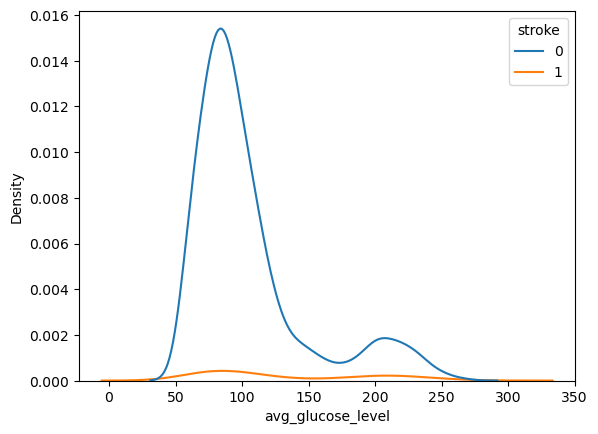

In [41]:
sns.kdeplot(data=df,x = 'avg_glucose_level',hue = 'stroke')

In [104]:
df['stroke'].value_counts()

0.0    4860
1.0     249
Name: stroke, dtype: int64

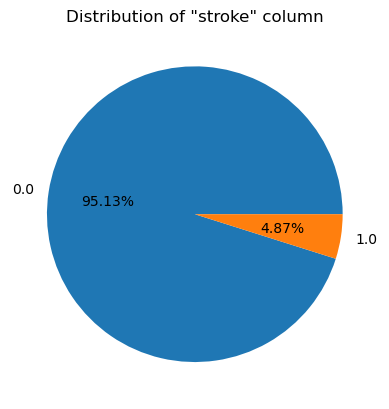

In [108]:
plt.pie(df['stroke'].value_counts(),labels=df['stroke'].value_counts().keys(),autopct='%0.2f%%')
plt.title('Distribution of "stroke" column')
plt.show()

In [42]:
category_col_lst

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

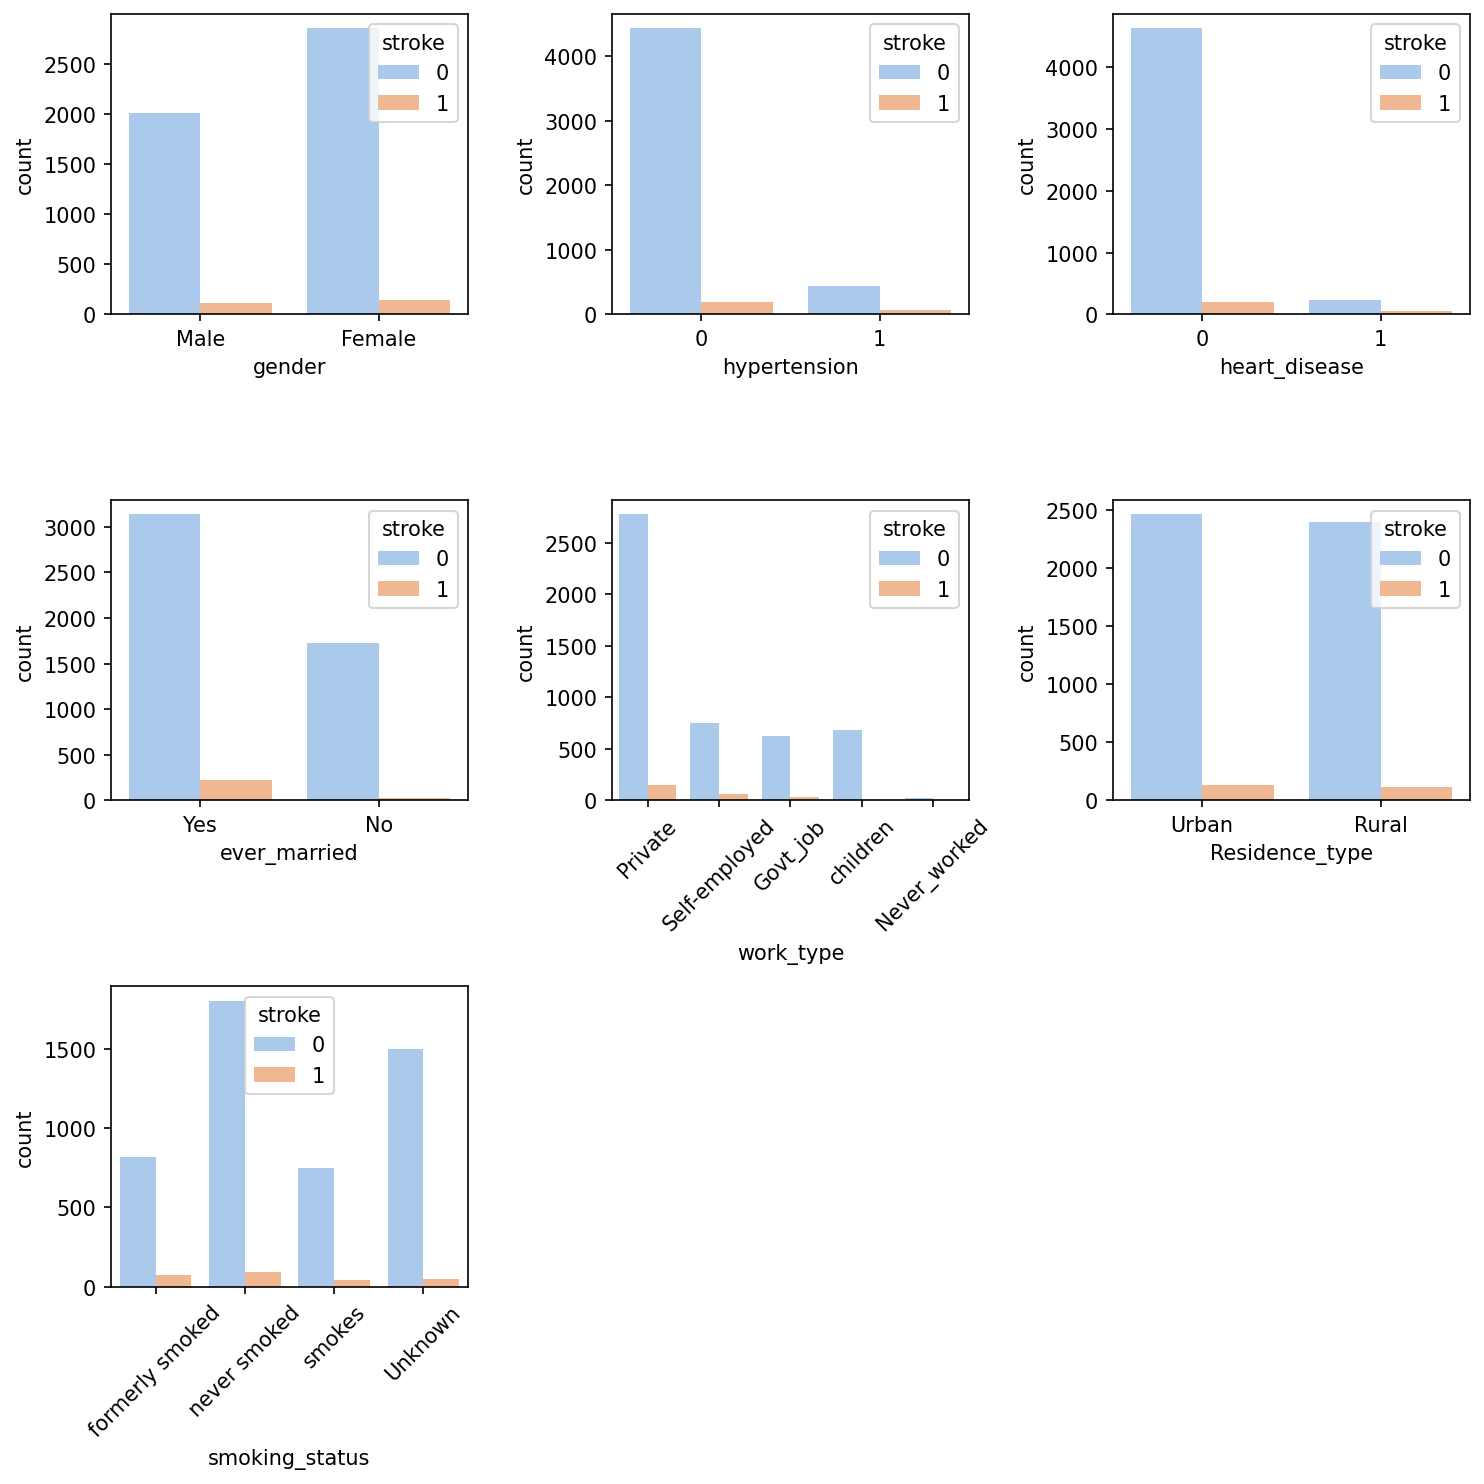

In [43]:
plt.figure(figsize=(10,10),dpi = 150)
for num,col in enumerate(category_col_lst,start=1):
    
    plt.subplot(3,3,num)
    
    sns.countplot(data = df,x = col,palette=sns.color_palette('pastel'),hue = 'stroke')
    
    if col in ['work_type','smoking_status']:
        plt.xticks(rotation = 45)
    
plt.tight_layout()

In [44]:
def percentage_stokes(col : str):
    
    main_dict = {}
    
    for class_ in df[col].value_counts().keys():
        temp_df = (df[df[col] == class_].groupby(['stroke']).count()[['id']]).copy()
        total = sum(temp_df['id'])
        try:
            percent_no_stroke = round((temp_df.loc[0].values[0]/total)*100,3)
        except:
            percent_no_stroke = 0
            
        try:
            percent_stroke = round((temp_df.loc[1].values[0]/total)*100,3)
        except:
            percent_stroke = 0
        main_dict[class_] = {'no_stroke' : percent_no_stroke,'stroke' : percent_stroke}
    
    return main_dict

In [45]:
def pie_plot(dictionary,plot_title):
    
    length = len(main_dict.keys())
    plt.figure(figsize=(10,10),dpi = 150)

    for num,key in enumerate(main_dict.keys(),start = 1):
        plt.subplot(3,2,num)
    
        plt.pie(main_dict[key].values(),labels=main_dict[key].keys(),autopct='%0.2f%%',colors=sns.color_palette('pastel'))
    
        plt.title(key)
    
    plt.suptitle(plot_title.upper())
    
    plt.tight_layout()
    
    plt.show()
    

In [46]:
main_dict = percentage_stokes('smoking_status')
main_dict

{'never smoked': {'no_stroke': 95.243, 'stroke': 4.757},
 'Unknown': {'no_stroke': 96.956, 'stroke': 3.044},
 'formerly smoked': {'no_stroke': 92.081, 'stroke': 7.919},
 'smokes': {'no_stroke': 94.677, 'stroke': 5.323}}

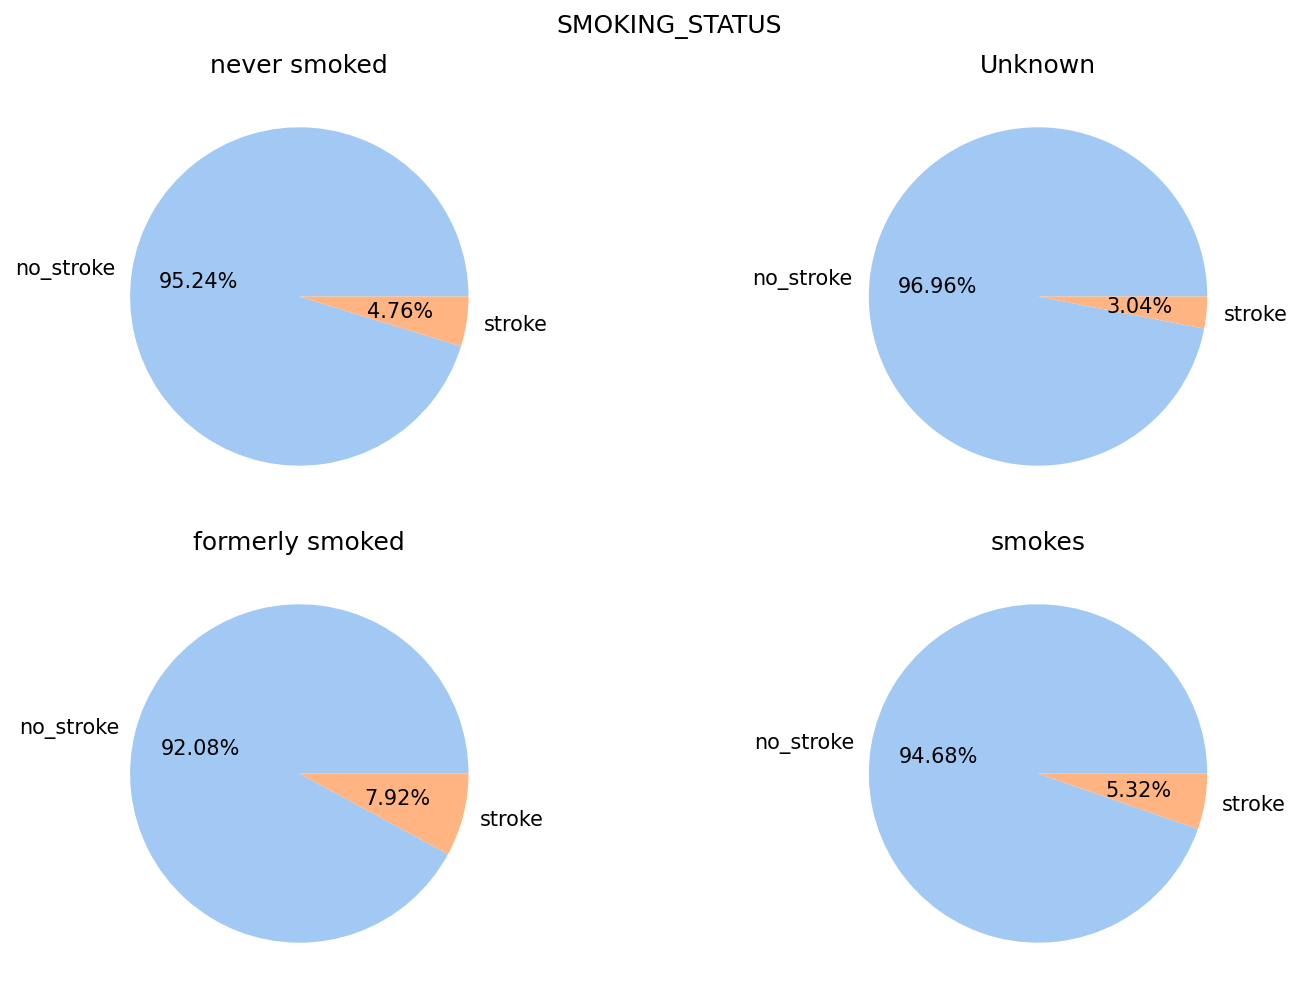

In [47]:
pie_plot(main_dict,'smoking_status')

In [48]:
main_dict = percentage_stokes('Residence_type')
main_dict

{'Urban': {'no_stroke': 94.8, 'stroke': 5.2},
 'Rural': {'no_stroke': 95.464, 'stroke': 4.536}}

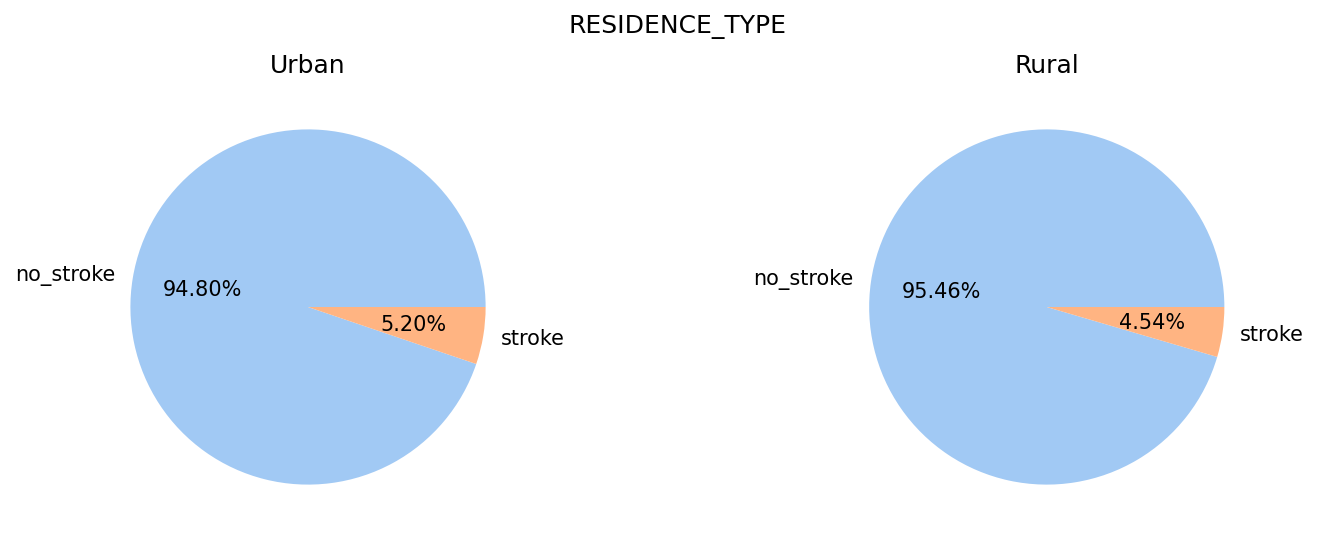

In [49]:
pie_plot(main_dict,'Residence_type')

In [50]:
main_dict = percentage_stokes('work_type')
main_dict

{'Private': {'no_stroke': 94.904, 'stroke': 5.096},
 'Self-employed': {'no_stroke': 92.063, 'stroke': 7.937},
 'children': {'no_stroke': 99.709, 'stroke': 0.291},
 'Govt_job': {'no_stroke': 94.977, 'stroke': 5.023},
 'Never_worked': {'no_stroke': 100.0, 'stroke': 0}}

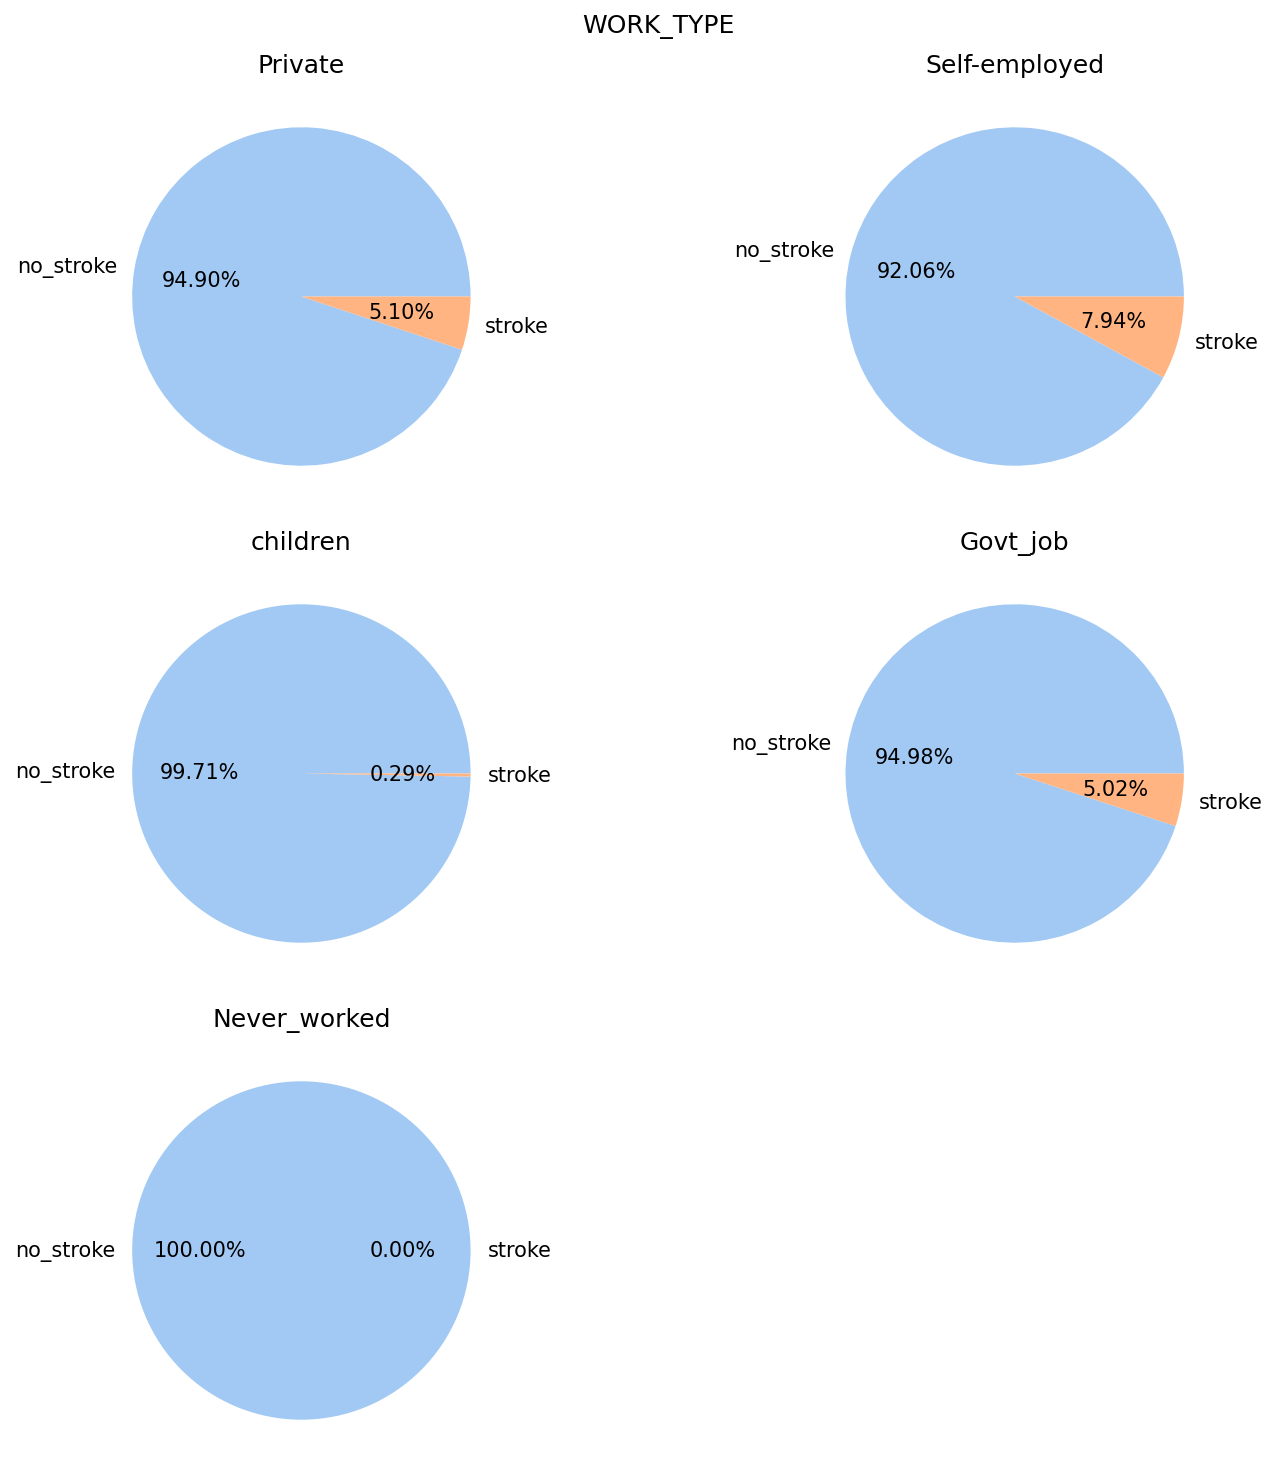

In [51]:
pie_plot(main_dict,'work_type')

In [52]:
df['work_type'] = df['work_type'].apply(lambda x :'Never_worked' if x == 'children' else x)

In [53]:
main_dict = percentage_stokes('work_type')
main_dict

{'Private': {'no_stroke': 94.904, 'stroke': 5.096},
 'Self-employed': {'no_stroke': 92.063, 'stroke': 7.937},
 'Never_worked': {'no_stroke': 99.718, 'stroke': 0.282},
 'Govt_job': {'no_stroke': 94.977, 'stroke': 5.023}}

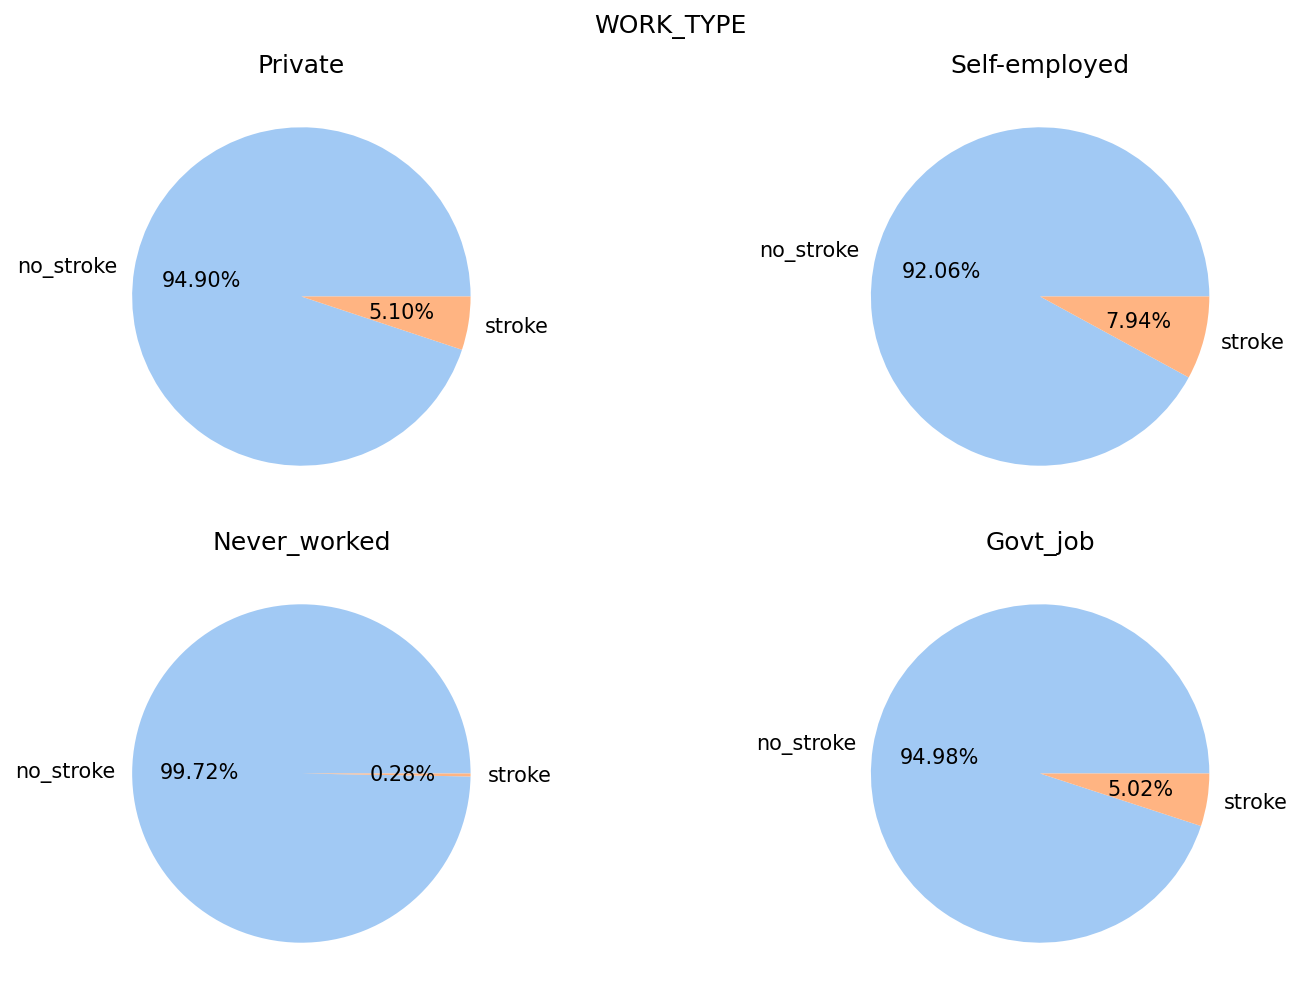

In [54]:
pie_plot(main_dict,'work_type')

In [55]:
main_dict = percentage_stokes('ever_married')
main_dict

{'Yes': {'no_stroke': 93.439, 'stroke': 6.561},
 'No': {'no_stroke': 98.349, 'stroke': 1.651}}

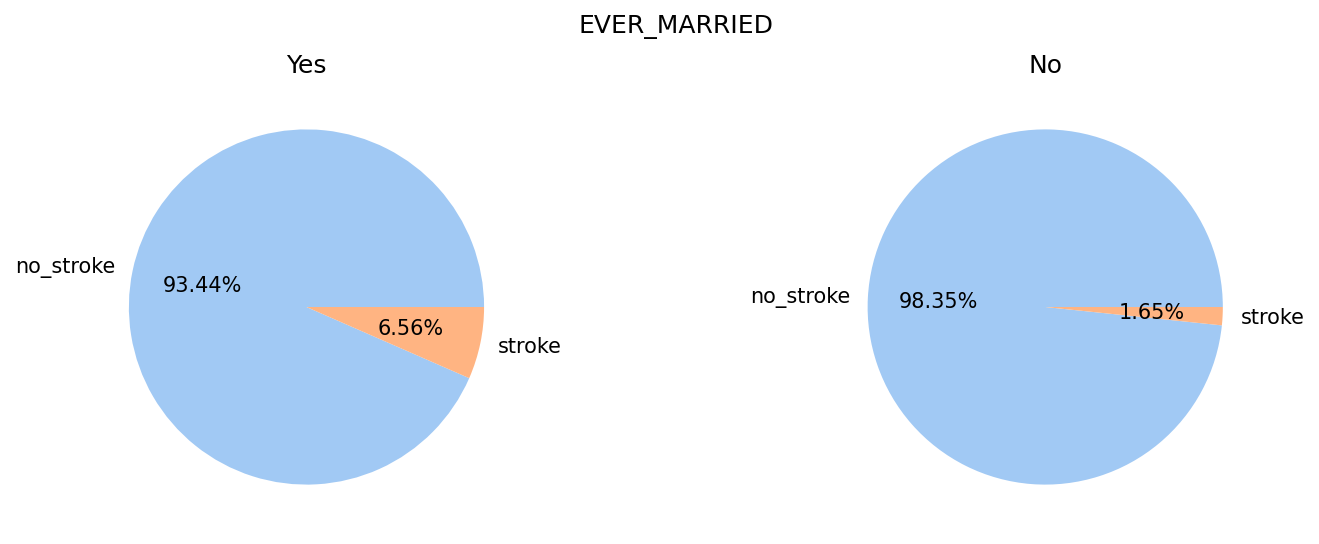

In [56]:
pie_plot(main_dict,'ever_married')

In [57]:
main_dict = percentage_stokes('heart_disease')
main_dict

{0: {'no_stroke': 95.82, 'stroke': 4.18},
 1: {'no_stroke': 82.971, 'stroke': 17.029}}

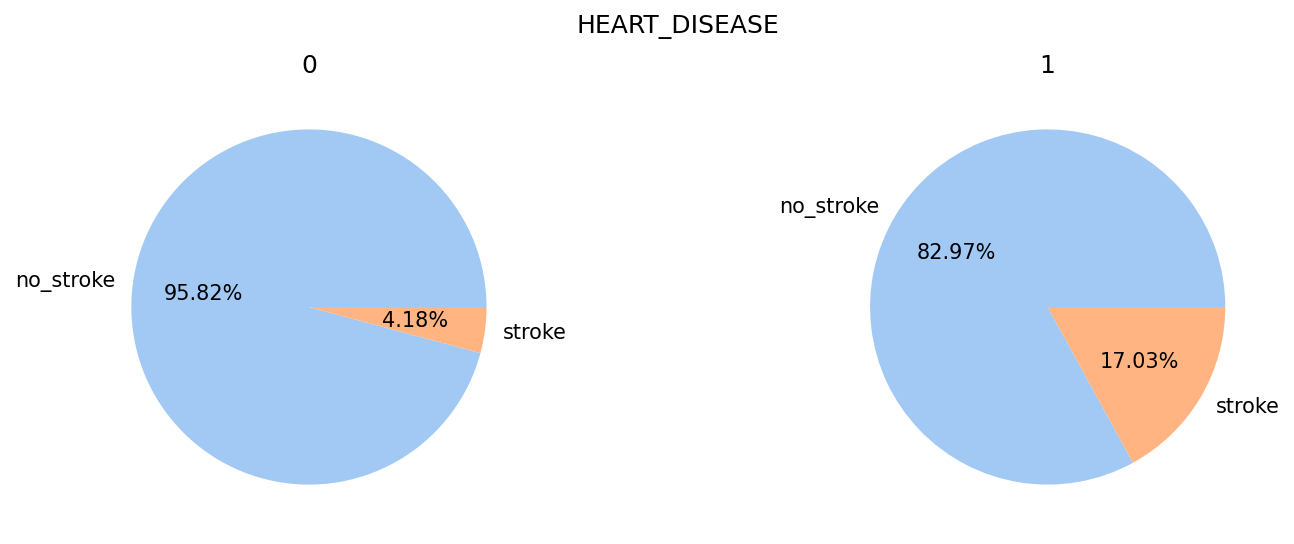

In [58]:
pie_plot(main_dict,'heart_disease')

In [59]:
main_dict = percentage_stokes('hypertension')
main_dict

{0: {'no_stroke': 96.031, 'stroke': 3.969},
 1: {'no_stroke': 86.747, 'stroke': 13.253}}

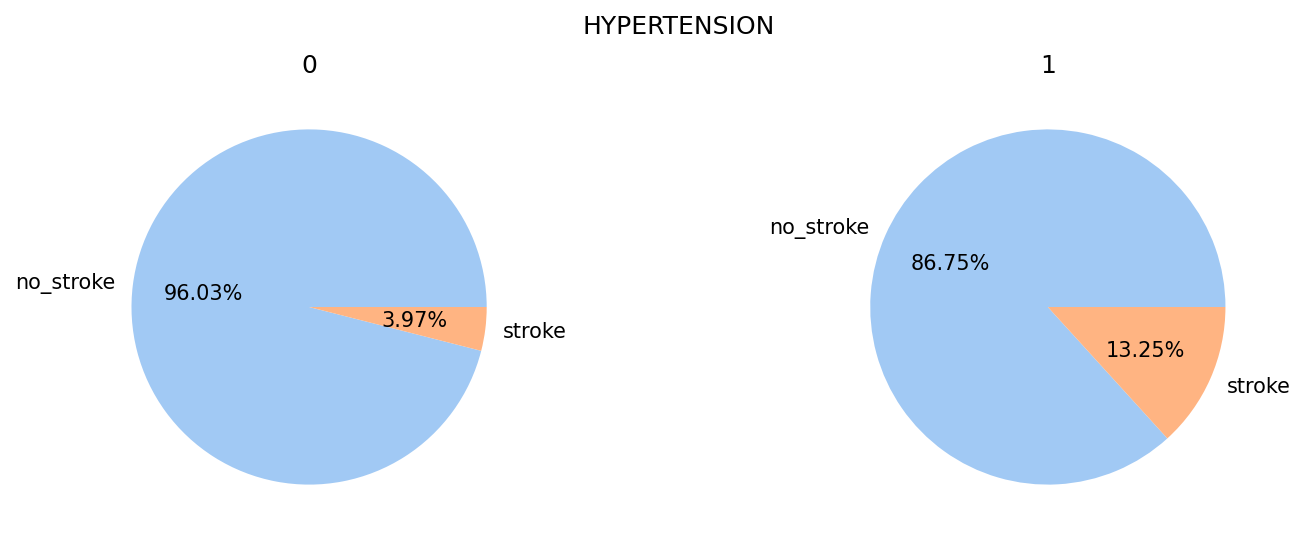

In [60]:
pie_plot(main_dict,'hypertension')

In [61]:
main_dict = percentage_stokes('gender')
main_dict

{'Female': {'no_stroke': 95.291, 'stroke': 4.709},
 'Male': {'no_stroke': 94.894, 'stroke': 5.106}}

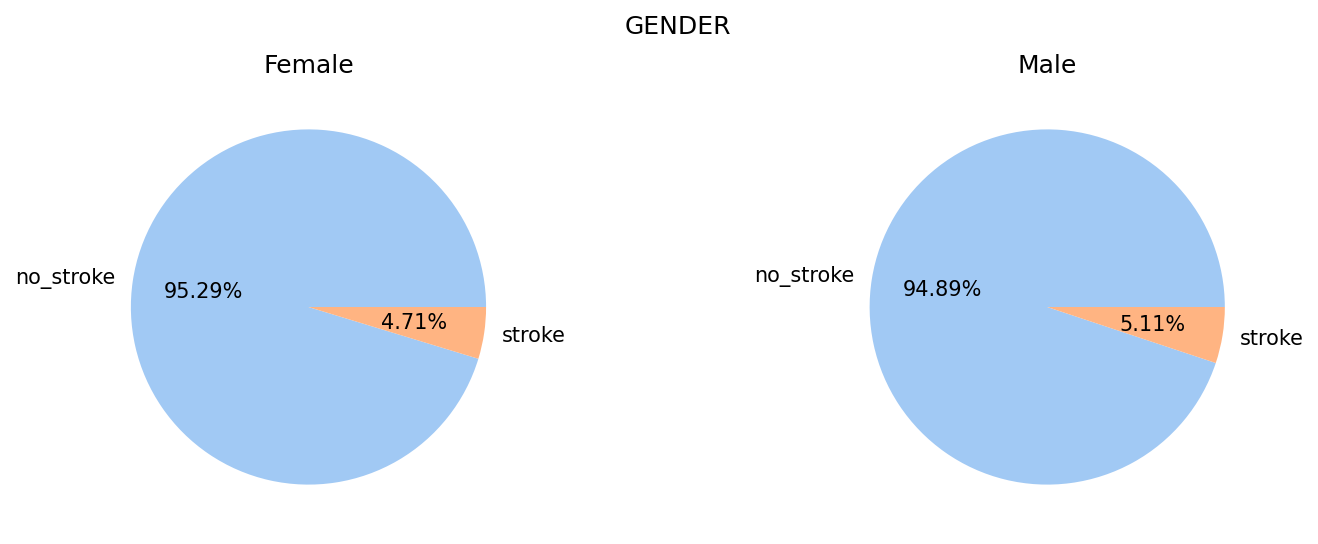

In [62]:
pie_plot(main_dict,'gender')

In [63]:
category_col_lst

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

In [64]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

# Handling Categorical Data

In [65]:
ct = ColumnTransformer([('One_hot_encoder',OneHotEncoder(),['gender','work_type','Residence_type']),
                  ('Ordinal',OrdinalEncoder(categories=[['No','Yes'],['never smoked','Unknown','formerly smoked','smokes']]),['ever_married','smoking_status'])],remainder='passthrough')

In [66]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('One_hot_encoder', OneHotEncoder(),
                                 ['gender', 'work_type', 'Residence_type']),
                                ('Ordinal',
                                 OrdinalEncoder(categories=[['No', 'Yes'],
                                                            ['never smoked',
                                                             'Unknown',
                                                             'formerly smoked',
                                                             'smokes']]),
                                 ['ever_married', 'smoking_status'])])

In [67]:
ct.fit(df)

ColumnTransformer(remainder='passthrough',
                  transformers=[('One_hot_encoder', OneHotEncoder(),
                                 ['gender', 'work_type', 'Residence_type']),
                                ('Ordinal',
                                 OrdinalEncoder(categories=[['No', 'Yes'],
                                                            ['never smoked',
                                                             'Unknown',
                                                             'formerly smoked',
                                                             'smokes']]),
                                 ['ever_married', 'smoking_status'])])

In [68]:
arr = ct.transform(df)

In [69]:
col_lst = ct.get_feature_names_out()

In [70]:
df = pd.DataFrame(data=arr,columns=[x.split('__')[-1] for x in col_lst]).drop(['id'],axis = 1).copy()

In [71]:
df.shape

(5109, 16)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender_Female            5109 non-null   float64
 1   gender_Male              5109 non-null   float64
 2   work_type_Govt_job       5109 non-null   float64
 3   work_type_Never_worked   5109 non-null   float64
 4   work_type_Private        5109 non-null   float64
 5   work_type_Self-employed  5109 non-null   float64
 6   Residence_type_Rural     5109 non-null   float64
 7   Residence_type_Urban     5109 non-null   float64
 8   ever_married             5109 non-null   float64
 9   smoking_status           5109 non-null   float64
 10  age                      5109 non-null   float64
 11  hypertension             5109 non-null   float64
 12  heart_disease            5109 non-null   float64
 13  avg_glucose_level        5109 non-null   float64
 14  bmi                     

In [73]:
numeric_col_lst

['age', 'avg_glucose_level', 'bmi']

In [74]:
df[numeric_col_lst].skew()

age                 -0.137430
avg_glucose_level    1.572815
bmi                  1.040167
dtype: float64

In [75]:
pt = PowerTransformer()

In [76]:
arr = pt.fit_transform(df[numeric_col_lst])

In [77]:
df[numeric_col_lst] 

,age,avg_glucose_level,bmi
0,67.0,228.69,36.60
1,61.0,202.21,29.34
2,80.0,105.92,32.50
3,49.0,171.23,34.40
4,79.0,174.12,24.00
...,...,...,...
5104,80.0,83.75,28.18
5105,81.0,125.20,40.00
5106,35.0,82.99,30.60
5107,51.0,166.29,25.60


In [78]:
df[numeric_col_lst]  = arr

In [79]:
df[numeric_col_lst]

,age,avg_glucose_level,bmi
0,1.032769,1.862392,1.029726
1,0.788093,1.700511,0.180829
2,1.552975,0.395031,0.572970
3,0.288329,1.445120,0.791238
4,1.513397,1.472918,-0.585873
...,...,...,...
5104,1.552975,-0.348434,0.026491
5105,1.592484,0.822589,1.372040
5106,-0.316876,-0.381167,0.341896
5107,0.372693,1.395291,-0.340116


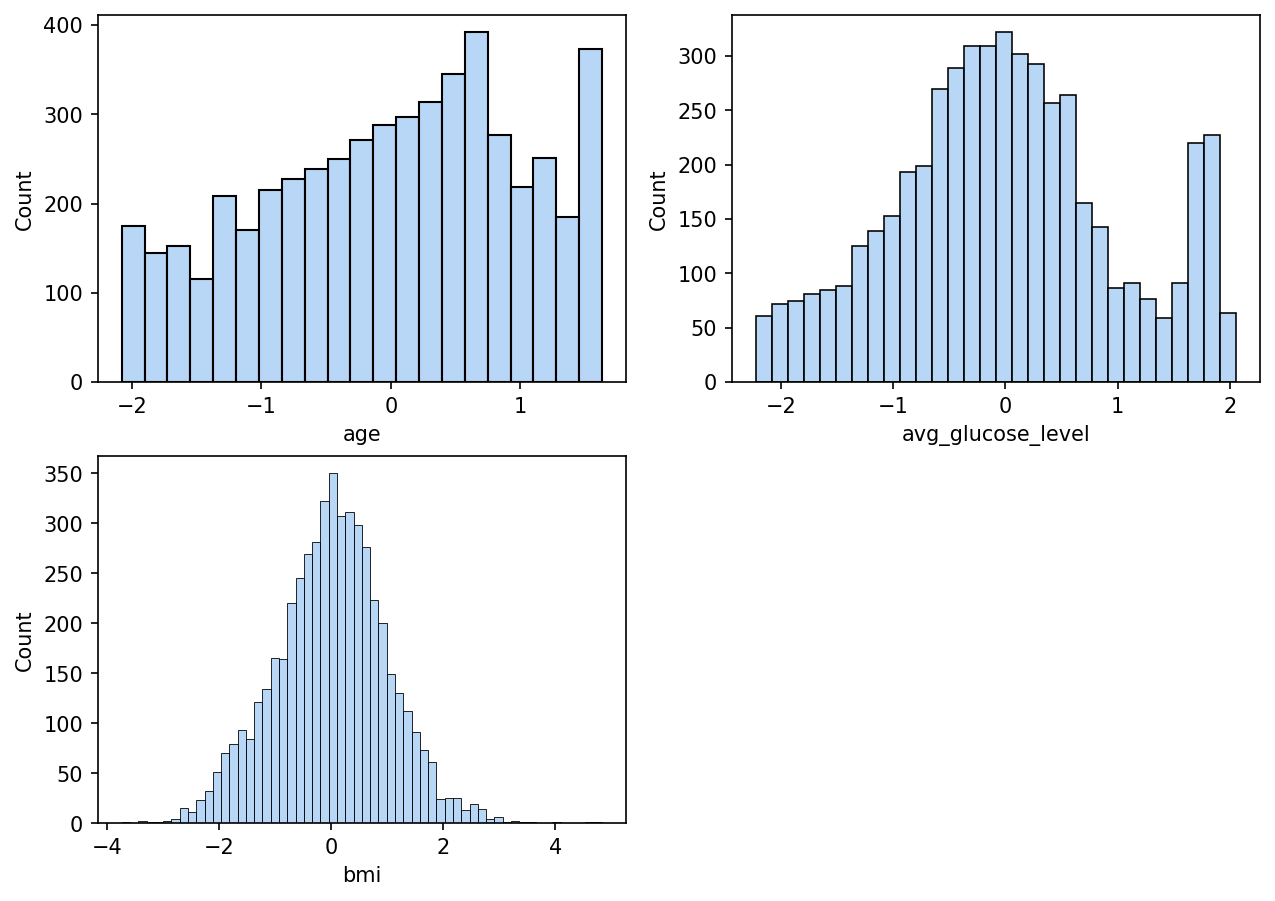

In [80]:
plt.figure(figsize=(10,7),dpi = 150)
for num,col in enumerate(numeric_col_lst,start=1):
    
    plt.subplot(2,2,num)
    
    sns.histplot(data = df,x = col,color=sns.color_palette('pastel')[0])

In [81]:
df[numeric_col_lst].skew()

age                 -0.278969
avg_glucose_level    0.084579
bmi                 -0.000106
dtype: float64

In [82]:
df[['bmi']].describe()

,bmi
count,5.109000e+03
mean,-9.651921e-16
std,1.000098e+00
min,-3.737542e+00
25%,-6.337066e-01
50%,2.920350e-02
75%,6.432117e-01
max,4.834596e+00


<Axes: xlabel='bmi'>

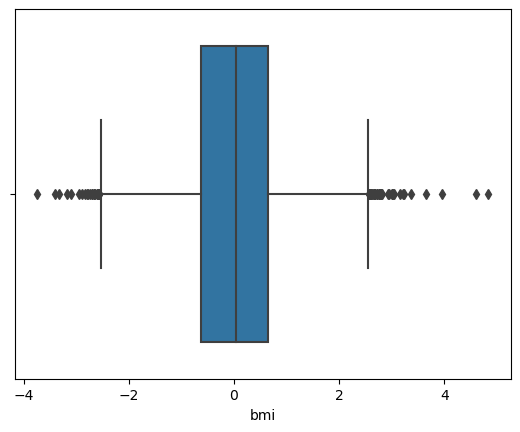

In [83]:
sns.boxplot(data = df,x = 'bmi')

In [84]:
mean = df[['bmi']].describe().loc['mean'].values[0]
std = df[['bmi']].describe().loc['std'].values[0]

In [85]:
lower_limit = mean - (3*std)
upper_limit = mean + (3*std)

In [86]:
upper_limit,max(df['bmi'])

(3.0002936426376126, 4.834595761205495)

In [87]:
min(df['bmi']),lower_limit

(-3.7375420834009985, -3.0002936426376143)

In [88]:
arr = df['bmi'].values

In [89]:
arr = np.where(arr < lower_limit,lower_limit,arr)

In [90]:
arr = np.where(arr > upper_limit,upper_limit,arr)

In [91]:
df['bmi'] = arr

In [92]:
df[numeric_col_lst].skew()

age                 -0.278969
avg_glucose_level    0.084579
bmi                 -0.034947
dtype: float64

# Dealing imbalance data

In [171]:
from sklearn.utils import resample

In [172]:
df_0 = df[df['stroke'] == 0]
df_1 = df[df['stroke'] == 1]

In [174]:
df_1 = resample(df_1,replace=True,n_samples=df_0.shape[0],random_state=42)

In [176]:
df = np.concatenate([df_0,df_1])

In [179]:
df = pd.DataFrame(df,columns=df_0.columns)

In [180]:
df['stroke'].value_counts()

0.0    4860
1.0    4860
Name: stroke, dtype: int64

# Splitting data

In [181]:
df.columns

Index(['gender_Female', 'gender_Male', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'Residence_type_Rural',
       'Residence_type_Urban', 'ever_married', 'smoking_status', 'age',
       'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke'],
      dtype='object')

In [182]:
X = df.drop(['stroke'],axis = 1)
y = df['stroke']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [184]:
X_train.shape,y_train.shape

((6512, 15), (6512,))

In [185]:
X_test.shape,y_test.shape

((3208, 15), (3208,))

In [186]:
df.shape

(9720, 16)

In [259]:
class classification_metrics:
    
    def __init__(self,true,pred):
        
        self.true = true
        self.pred = pred
        self.accuracy = round(accuracy_score(self.true,self.pred)*100,2)
        self.error = round(100 - self.accuracy,2)
        self.f1_score = round(f1_score(self.true,self.pred),2)
        self.confusion_matrix = confusion_matrix(self.true,self.pred)
        
        self.true_negatives = self.confusion_matrix[0][0]
        self.true_positives = self.confusion_matrix[1][1]
        self.false_positives = self.confusion_matrix[0][1]
        self.false_negatives = self.confusion_matrix[1][0]
        
        self.true_positive_rate = round(self.true_positives/(self.true_positives+self.false_negatives),3)
        self.recall = self.true_positive_rate
        
        self.positive_predictive_rate = round(self.true_positives/(self.true_positives+self.false_positives),3)
        self.precision = self.positive_predictive_rate
        
        self.false_positive_rate = round(self.false_positives/(self.false_positives+self.true_negatives),3)
        self.type1_error = self.false_positive_rate
        
        self.false_negative_rate = round(self.false_negatives/(self.false_negatives+self.true_positives),3)
        self.type2_error = self.false_negative_rate

# Model training and selection

# Logistic Regression

In [260]:
lr = LogisticRegression()

In [261]:
lr.fit(X_train,y_train)

LogisticRegression()

In [262]:
pred = lr.predict(X_test)

In [263]:
lr_metrics = classification_metrics(y_test,pred)

In [264]:
lr_metrics.accuracy

77.77

In [265]:
lr_metrics.type2_error

0.191

In [266]:
params = {'penalty' : ['l1', 'l2', 'elasticnet', None],
         'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [267]:
lr_gs = GridSearchCV(estimator=lr,param_grid=params,cv = 10,scoring='accuracy')

In [268]:
lr_gs.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [269]:
lr_gs.best_params_

{'penalty': 'l2', 'solver': 'lbfgs'}

In [270]:
pred = lr_gs.predict(X_test)

In [271]:
lr_gs_metrics = classification_metrics(y_test,pred)

In [272]:
lr_gs_metrics.accuracy

77.77

In [273]:
lr_gs_metrics.type2_error

0.191

In [285]:
lr_gs_metrics.confusion_matrix

array([[1185,  403],
       [ 310, 1310]])

# Naive Bayes

In [274]:
nb = GaussianNB()

In [275]:
nb.fit(X_train,y_train)

GaussianNB()

In [276]:
pred = nb.predict(X_test)

In [278]:
nb_metrics = classification_metrics(y_test,pred)

In [279]:
nb_metrics.accuracy

74.81

In [280]:
nb_metrics.type2_error

0.101

In [286]:
nb_metrics.confusion_matrix

array([[ 943,  645],
       [ 163, 1457]])

# Decision Trees classifier

In [287]:
dt = DecisionTreeClassifier()

In [288]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [289]:
pred = dt.predict(X_test)

In [290]:
dt_metrics = classification_metrics(pred,y_test)

In [291]:
dt_metrics.accuracy

97.19

In [292]:
dt_metrics.type2_error

0.053

In [293]:
dt_metrics.confusion_matrix

array([[1498,    0],
       [  90, 1620]])

In [296]:
params = {'criterion' : ["gini", "entropy", "log_loss"],
         'splitter' : ["best"]}

In [297]:
dt_gs = GridSearchCV(estimator=dt,param_grid=params,cv = 10,scoring='f1')

In [298]:
dt_gs.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best']},
             scoring='f1')

In [299]:
dt_gs.best_params_

{'criterion': 'log_loss', 'splitter': 'best'}

In [300]:
pred = dt_gs.predict(X_test)

In [301]:
dt_gs_metrics = classification_metrics(y_test,pred)

In [302]:
dt_gs_metrics.accuracy

96.51

In [303]:
dt_gs_metrics.type2_error

0.0

In [304]:
dt_gs_metrics.confusion_matrix

array([[1476,  112],
       [   0, 1620]])

# KNearest Neighbours classifier

In [305]:
knn = KNeighborsClassifier()

In [306]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [307]:
pred = knn.predict(X_test)

In [309]:
knn_metrics = classification_metrics(y_test,pred)

In [310]:
knn_metrics.accuracy

93.17

In [311]:
knn_metrics.type2_error

0.0

In [312]:
knn_metrics.confusion_matrix

array([[1369,  219],
       [   0, 1620]])

In [313]:
params = {'n_neighbors' : [x for x in range(1,15)]}

In [315]:
knn_gs = GridSearchCV(estimator=knn,param_grid=params,cv = 10,scoring='f1')

In [316]:
knn_gs.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]},
             scoring='f1')

In [317]:
knn_gs.best_params_

{'n_neighbors': 1}

In [318]:
pred = knn_gs.predict(X_test)

In [319]:
knn_gs_metrics = classification_metrics(y_test,pred)

In [320]:
knn_gs_metrics.accuracy

97.63

In [321]:
knn_gs_metrics.type2_error

0.0

In [322]:
knn_gs_metrics.confusion_matrix

array([[1512,   76],
       [   0, 1620]])

# Support vector machine

In [323]:
svm = SVC()

In [324]:
svm.fit(X_train,y_train)

SVC()

In [325]:
pred = svm.predict(X_test)

In [326]:
svm_metrics = classification_metrics(y_test,pred)

In [327]:
svm_metrics.accuracy

83.79

In [328]:
svm_metrics.type2_error

0.087

In [329]:
svm_metrics.confusion_matrix

array([[1209,  379],
       [ 141, 1479]])

In [343]:
params = {'kernel' : ['rbf'],
         'degree' : [i for i in range(2,4)],
         'gamma' : ['scale']}

In [344]:
svm_gs = GridSearchCV(estimator=svm,param_grid=params,scoring='f1',cv = 10)

In [345]:
svm_gs.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'degree': [2, 3], 'gamma': ['scale'],
                         'kernel': ['rbf']},
             scoring='f1')

In [346]:
svm_gs.best_params_

{'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [347]:
pred = svm_gs.predict(X_test)

In [348]:
svm_gs_metrics = classification_metrics(y_test,pred)

In [349]:
svm_gs_metrics.accuracy

83.79

In [350]:
svm_gs_metrics.type2_error

0.087

In [351]:
svm_gs_metrics.confusion_matrix

array([[1209,  379],
       [ 141, 1479]])

# Random Forests classifier

In [352]:
rf = RandomForestClassifier()

In [353]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [354]:
pred = rf.predict(X_test)

In [355]:
rf_metrics = classification_metrics(y_test,pred)

In [356]:
rf_metrics.accuracy

99.1

In [357]:
rf_metrics.confusion_matrix

array([[1559,   29],
       [   0, 1620]])

In [358]:
rf_metrics.type2_error

0.0

# XGBoost

In [411]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [412]:
pred = model.predict(X_test)

In [413]:
xgb_metrics = classification_metrics(y_test,pred)

In [414]:
xgb_metrics.accuracy

97.51

In [415]:
xgb_metrics.confusion_matrix

array([[1508,   80],
       [   0, 1620]])

In [416]:
xgb_metrics.type2_error

0.0

# Voting technique

In [418]:
estimators = [('dt_gs',dt_gs),('knn_gs',knn_gs),('rf',rf),('xgb',model)]

In [419]:
vc = VotingClassifier(estimators=estimators)

In [420]:
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('dt_gs',
                              GridSearchCV(cv=10,
                                           estimator=DecisionTreeClassifier(),
                                           param_grid={'criterion': ['gini',
                                                                     'entropy',
                                                                     'log_loss'],
                                                       'splitter': ['best']},
                                           scoring='f1')),
                             ('knn_gs',
                              GridSearchCV(cv=10,
                                           estimator=KNeighborsClassifier(),
                                           param_grid={'n_neighbors': [1, 2, 3,
                                                                       4, 5, 6,
                                                                       7, 8, 9,
                                                                       10, 11,
                                                                       12, 13,
                                                                       14]},
                                           scoring='f1')),
                             ('rf', RandomForestClassifier(...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

In [421]:
pred = vc.predict(X_test)

In [422]:
vc_metrics = classification_metrics(y_test,pred)

In [423]:
vc_metrics.accuracy

99.63

In [424]:
vc_metrics.confusion_matrix

array([[1576,   12],
       [   0, 1620]])

In [425]:
vc_metrics.type2_error

0.0

# Bagging

In [428]:
bc = BaggingClassifier(estimator=model)

In [429]:
bc.fit(X_train,y_train)

BaggingClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...))

In [430]:
pred = bc.predict(X_test)

In [431]:
bc_metrics = classification_metrics(y_test,pred)

In [432]:
bc_metrics.accuracy

96.79

In [433]:
bc_metrics.confusion_matrix

array([[1485,  103],
       [   0, 1620]])

In [434]:
bc_metrics.type2_error

0.0

# Stacking Technique

In [435]:
base_models = [('dt_gs',dt_gs),('knn_gs',knn_gs),('rf',rf)]

In [436]:
sc = StackingClassifier(estimators=base_models,final_estimator=model,cv = 10)

In [437]:
sc.fit(X_train,y_train)

StackingClassifier(cv=10,
                   estimators=[('dt_gs',
                                GridSearchCV(cv=10,
                                             estimator=DecisionTreeClassifier(),
                                             param_grid={'criterion': ['gini',
                                                                       'entropy',
                                                                       'log_loss'],
                                                         'splitter': ['best']},
                                             scoring='f1')),
                               ('knn_gs',
                                GridSearchCV(cv=10,
                                             estimator=KNeighborsClassifier(),
                                             param_grid={'n_neighbors': [1, 2,
                                                                         3, 4,
                                                                         5, 6,
                                                                         7, 8,
                                                                         9, 10,
                                                                         11, 12,
                                                                         13,
                                                                         14]},
                                             scoring='f1')),
                               ('rf', RandomForestCla...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=None, ...))

In [438]:
pred = sc.predict(X_test)

In [439]:
sc_metrics = classification_metrics(y_test,pred)

In [440]:
sc_metrics.accuracy

100.0

In [441]:
sc_metrics.type2_error

0.0

In [442]:
sc_metrics.f1_score

1.0

In [443]:
sc_metrics.confusion_matrix

array([[1588,    0],
       [   0, 1620]])